In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读取图像
img1 = cv2.imread('./1.jpg', 0)
img2 = cv2.imread('./fishX-rays_lowContrast.jpg', 0)

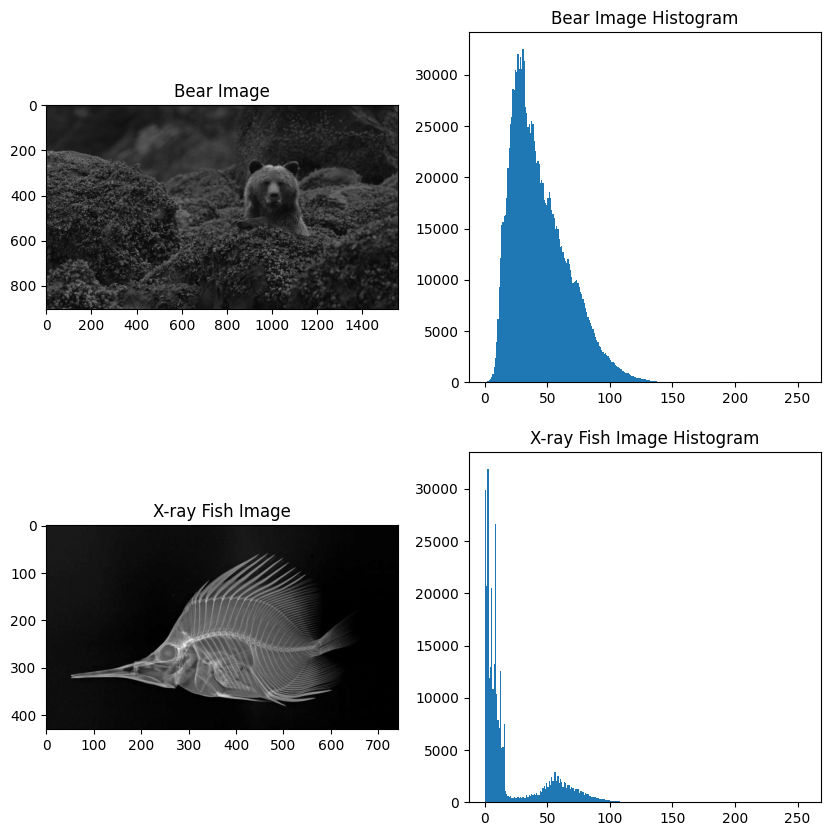

In [37]:
# 绘制处理前图像及直方图
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Bear Image')
axs[0, 1].hist(img1.ravel(), 256, [0, 256])
axs[0, 1].set_title('Bear Image Histogram')
axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('X-ray Fish Image')
axs[1, 1].hist(img2.ravel(), 256, [0, 256])
axs[1, 1].set_title('X-ray Fish Image Histogram')
plt.show()

In [27]:
def adjust_gamma(image, gamma=1.0):
    # 构建一个包含所有像素灰度值的幂次方变换表
    inv_gamma = 1.0 * gamma
    table = (np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]))
    
    # 应用幂次方变换表对图像进行gamma变换
    return cv2.LUT(image, table.astype(np.uint8))

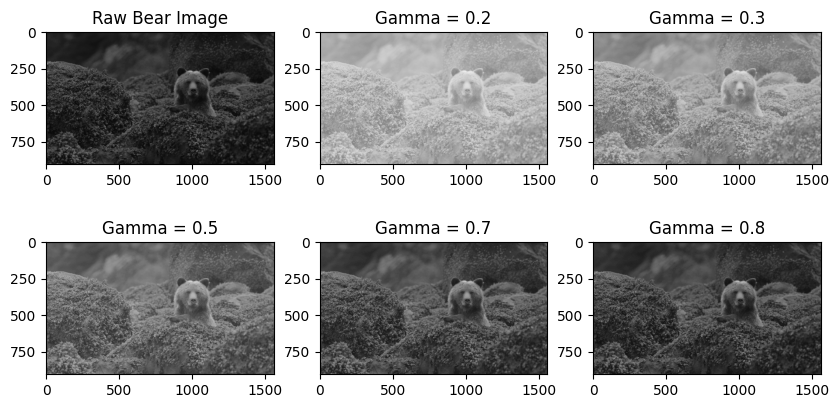

In [34]:
gamma_list_high = [1.5, 2, 2.2, 3, 3.5]
gamma_list_low = [0.2, 0.3, 0.5, 0.7, 0.8]

fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Raw Bear Image')

# Reshape axs to a 1D array
axs = axs.reshape(-1)

# Iterate over gamma_list and set the image and title for each subplot
for idx, gamma in enumerate(gamma_list_low):
    img_adjusted = adjust_gamma(img1, gamma=gamma)
    axs[idx+1].imshow(img_adjusted, cmap='gray')
    axs[idx+1].set_title('Gamma = {}'.format(gamma))

plt.show()

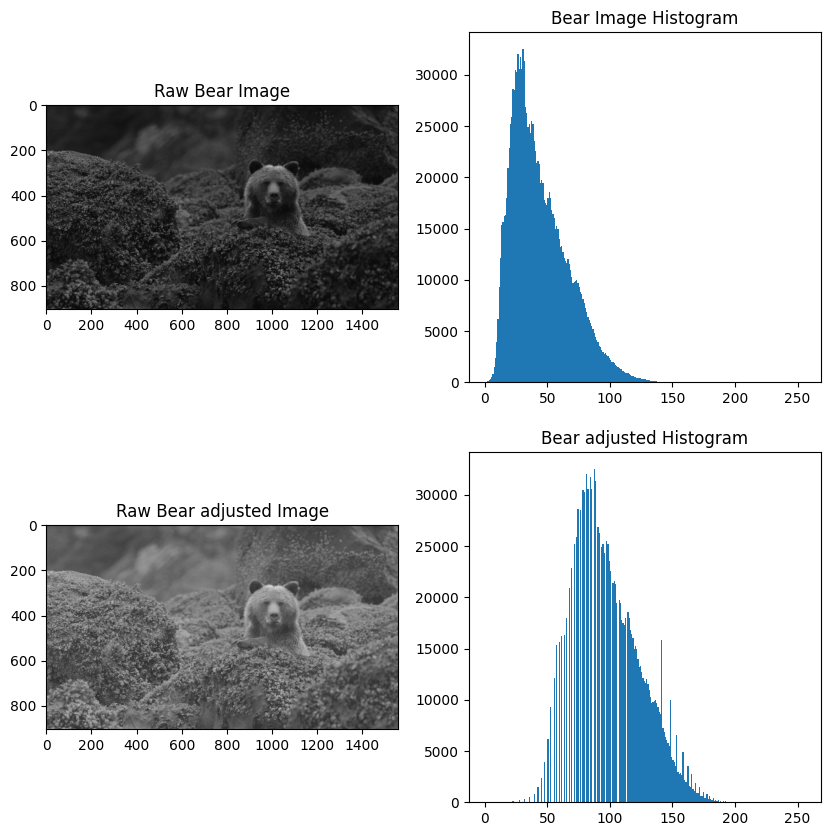

In [32]:
# 应用gamma变换
img1_adjusted = adjust_gamma(img1, gamma=0.5)

# 绘制处理前后图像及直方图
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Raw Bear Image')
axs[0, 1].hist(img1.ravel(), 256, [0, 256])
axs[0, 1].set_title('Bear Image Histogram')
axs[1, 0].imshow(img1_adjusted, cmap='gray')
axs[1, 0].set_title('Raw Bear adjusted Image')
axs[1, 1].hist(img1_adjusted.ravel(), 256, [0, 256])
axs[1, 1].set_title('Bear adjusted Histogram')
plt.show()

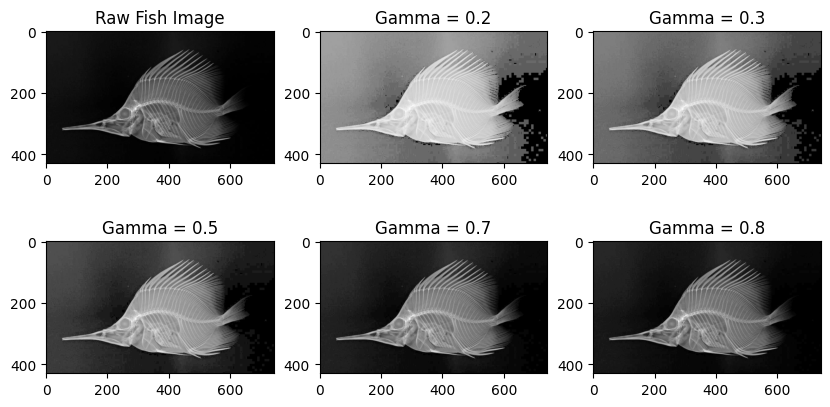

In [35]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs[0, 0].imshow(img2, cmap='gray')
axs[0, 0].set_title('Raw Fish Image')

# Reshape axs to a 1D array
axs = axs.reshape(-1)

# Iterate over gamma_list and set the image and title for each subplot
for idx, gamma in enumerate(gamma_list_low):
    img_adjusted = adjust_gamma(img2, gamma=gamma)
    axs[idx+1].imshow(img_adjusted, cmap='gray')
    axs[idx+1].set_title('Gamma = {}'.format(gamma))

plt.show()

Text(0.5, 1.0, 'Fish adjusted Histogram')

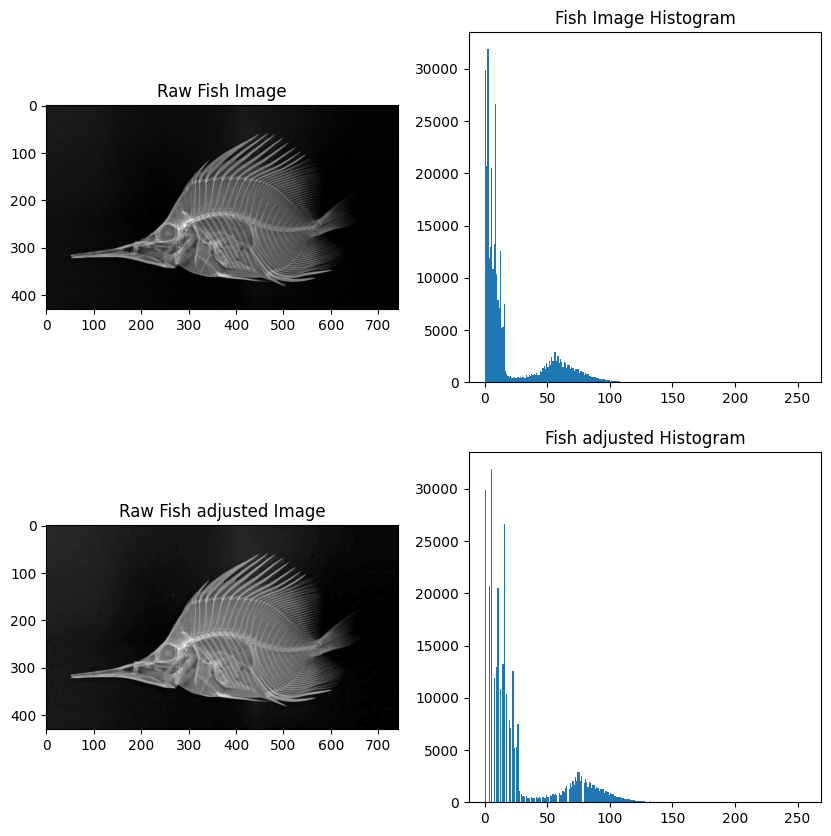

In [33]:
# 应用gamma变换
img2_adjusted = adjust_gamma(img2, gamma=0.8)

# 绘制处理前后图像及直方图
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img2, cmap='gray')
axs[0, 0].set_title('Raw Fish Image')
axs[0, 1].hist(img2.ravel(), 256, [0, 256])
axs[0, 1].set_title('Fish Image Histogram')
axs[1, 0].imshow(img2_adjusted, cmap='gray')
axs[1, 0].set_title('Raw Fish adjusted Image')
axs[1, 1].hist(img2_adjusted.ravel(), 256, [0, 256])
axs[1, 1].set_title('Fish adjusted Histogram')